In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import joblib


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
df1 = pd.read_csv("/content/drive/MyDrive/Mini projects/ecommerceDataset.csv/ecommerceDataset.csv", header=None)

In [10]:
df1.columns = ['label', 'text']
df1.dropna(inplace=True)
df1.drop_duplicates(inplace=True)

In [11]:
all_stopwords = stopwords.words('english')

all_stopwords = list(all_stopwords[:132] + all_stopwords[133:142])


corpus = df1['text'].values.tolist()

In [12]:
cv = CountVectorizer(max_features=2000, stop_words=all_stopwords)
X = cv.fit_transform(corpus).toarray()

In [13]:
le = LabelEncoder()
df1['label'] = le.fit_transform(df1['label'])
y = df1['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using RandomForestClassifier

In [15]:
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
model

RandomForestClassifier()

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9257327818737637


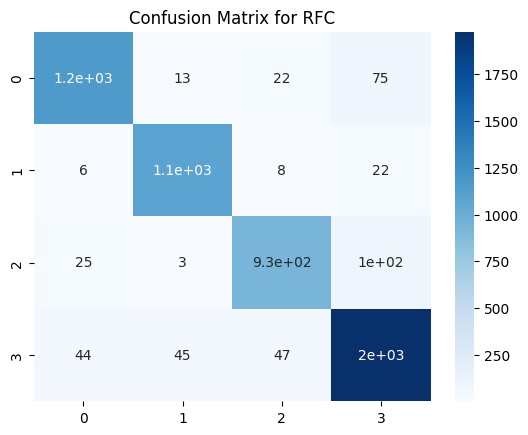

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix for RFC')
plt.show()

In [19]:
joblib.dump(model, 'random_forest_model.pkl')

joblib.dump(cv, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

## Using TensorFlow

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [21]:
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model_nn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8456 - loss: 0.5322 - val_accuracy: 0.9407 - val_loss: 0.2200
Epoch 2/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9581 - loss: 0.1445 - val_accuracy: 0.9399 - val_loss: 0.2262
Epoch 3/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9794 - loss: 0.0732 - val_accuracy: 0.9363 - val_loss: 0.2752
Epoch 4/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9880 - loss: 0.0445 - val_accuracy: 0.9396 - val_loss: 0.3204
Epoch 5/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9927 - loss: 0.0264 - val_accuracy: 0.9365 - val_loss: 0.3821
Epoch 6/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9941 - loss: 0.0212 - val_accuracy: 0.9358 - val_loss: 0.3872
Epoch 7/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9951 - loss: 0.0199 - val_accuracy: 0.9358 - val_loss: 0.3979
Epoch 8/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9957 - loss: 0.0185 - val_accuracy

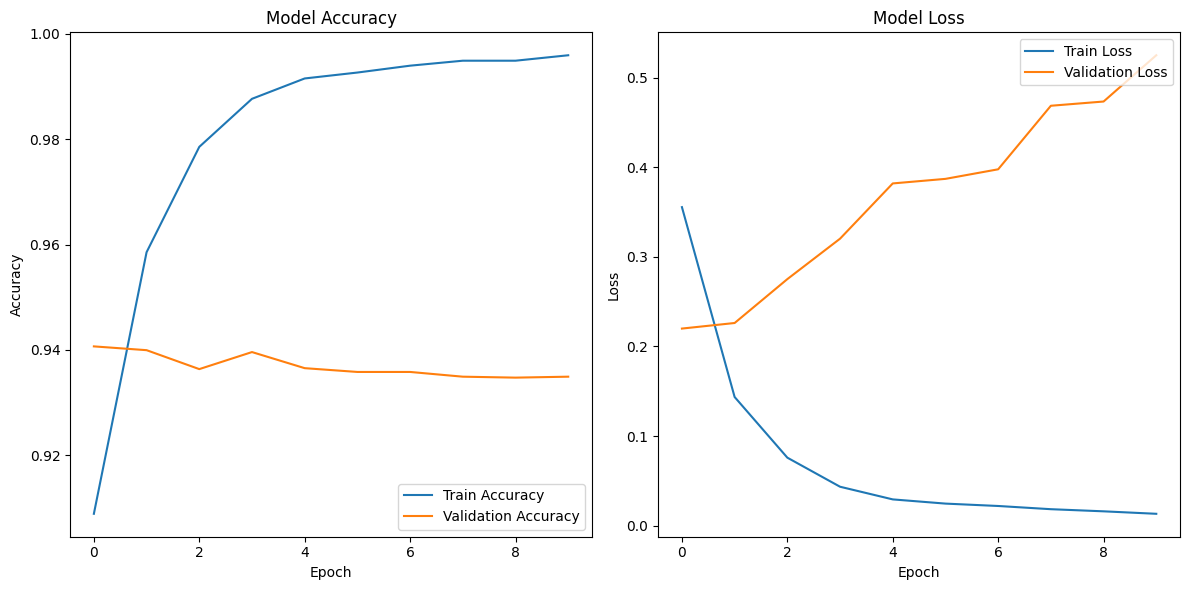

In [23]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [24]:
model_nn.save('neural_network_model.h5')


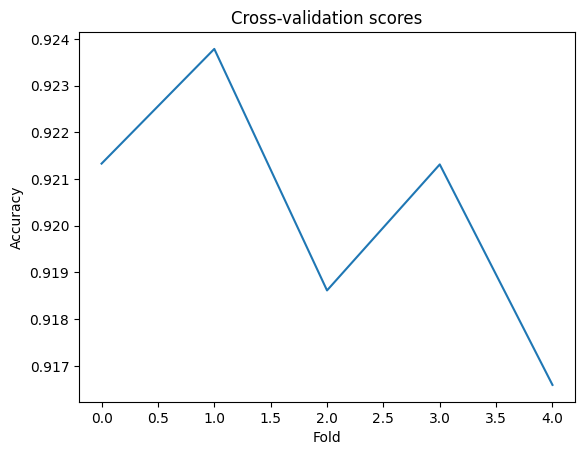

In [25]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(model, X_train, y_train, cv=5)


plt.plot(cv_scores)
plt.title('Cross-validation scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()


## Prediction on Random Generated text for RandomForestClassifier Model

In [26]:
loaded_model = joblib.load('random_forest_model.pkl')

loaded_cv = joblib.load('count_vectorizer.pkl')


# from tensorflow.keras.models import load_model
# loaded_nn_model = load_model('neural_network_model.h5')


In [28]:
import random

categories = {0: "Books", 1: "Clothing & Accessories", 2: "Electronics", 3: "Household"}


random_text = []
for _ in range(10):
    category = random.choice(list(categories.values()))
    template = "A {adj} {item} for {purpose}.".format(
        adj=random.choice(["amazing", "innovative", "stylish"]),
        item=random.choice(["shirt", "lamp", "headphones"]),
        purpose=random.choice(["work", "play", "study"])
    )
    random_text.append({"label": category, "text": template})


df_random = pd.DataFrame(random_text)



In [29]:
X_random = loaded_cv.transform(df_random['text']).toarray()
predictions = loaded_model.predict(X_random)
probabilities = loaded_model.predict_proba(X_random)

df_random['Predicted Class'] = predictions
df_random['Class Probabilities'] = list(probabilities)
df_random['Predicted Class Name'] = df_random['Predicted Class'].map(categories)


In [30]:
for index, row in df_random.iterrows():
    print(f"Text: {row['text']}")
    print(f"Predicted Class: {row['Predicted Class Name']}")
    print(f"Class Probabilities: {row['Class Probabilities']}")
    print("-" * 40)

Text: A amazing shirt for study.
Predicted Class: Clothing & Accessories
Class Probabilities: [0.19937872 0.77257188 0.00435938 0.02369002]
----------------------------------------
Text: A stylish headphones for play.
Predicted Class: Books
Class Probabilities: [0.55395333 0.25614846 0.1009403  0.08895791]
----------------------------------------
Text: A stylish headphones for play.
Predicted Class: Books
Class Probabilities: [0.55395333 0.25614846 0.1009403  0.08895791]
----------------------------------------
Text: A innovative shirt for study.
Predicted Class: Clothing & Accessories
Class Probabilities: [0.18937872 0.77257188 0.00435938 0.03369002]
----------------------------------------
Text: A stylish shirt for work.
Predicted Class: Clothing & Accessories
Class Probabilities: [0.13198896 0.82204966 0.00268763 0.04327375]
----------------------------------------
Text: A innovative lamp for work.
Predicted Class: Books
Class Probabilities: [0.54860458 0.01770804 0.03208325 0.40160